In [3]:
import pickle
filename="Data/github_users.p"
infile = open(filename,'rb')
github = pickle.load(infile)
infile.close()

In [4]:
github

Nodes : Users 

Edges : Collboration in the github repository


* Analyse Structure
* Visualize
* Build Recommendation system

In [6]:
import networkx as nx

In [10]:
print("The number of nodes are ..",len(github.nodes()))
print("The number of edges connecting the nodes are ..",len(github.edges()))

The number of nodes are .. 56519
The number of edges connecting the nodes are .. 74095


##### Properties needed

* Betweenness centrality
* Degree centrality

plot them.

Returns : key -> node_name and value-> centrality score

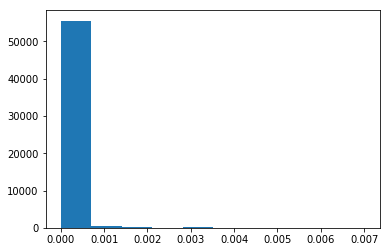

In [14]:
import matplotlib.pyplot as plt
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(github).values()))
plt.show()

In [18]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(github).values()))
plt.show()

KeyboardInterrupt: 

##### Visualisation

In [23]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt 

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(github), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

ModuleNotFoundError: No module named 'nxviz'

In [ ]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in github.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    github.node[n]['degree'] = nx.degree(github, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph=github, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [ ]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in github.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    github.node[n]['degree'] = nx.degree(github, n)

# Create the CircosPlot object: c
c = CircosPlot((github), node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

##### Clique

* Group of nodes fully connected

* Simplest : edge
    
* Simplest complex : Triangle

* Maximal Clique : cannot be extended by attending an another node in the group

goal : Identifying clique

In [22]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(github)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

52657


In [25]:
# Import necessary modules

from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

ModuleNotFoundError: No module named 'nxviz'

##### Goals

* Find important users - Degree centrality
* Find largest collaborator community - Maximum Clique
* Building an recommendation system - Open triangles


In [26]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(github)

# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u89']


In [27]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(github), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
github_lmc = github.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in github_lmc.nodes():
    github_lmc.add_nodes_from(github.neighbors(node))
    github_lmc.add_edges_from(zip([node]*len(github.neighbors(node)), github.neighbors(node)))

# Record each node's degree centrality score
for n in github_lmc.nodes():
    github_lmc.node[n]['degree centrality'] = nx.degree_centrality(github_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(github_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

ModuleNotFoundError: No module named 'nxviz'

In [28]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in github.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(github.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not github.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('u298', 'u1682'), ('u298', 'u211'), ('u298', 'u198'), ('u298', 'u1294')]
